In [1]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl


import neuro_morpho_toolbox as nmt
%matplotlib inline
import pickle
pickle_in = open("/home/penglab/FeaCal/all_ns.pickle","rb")
[ns] = pickle.load(pickle_in)


/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox-0.1-py3.7.egg/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.82
Loading CCF brain structure data...
Loading time: 0.00


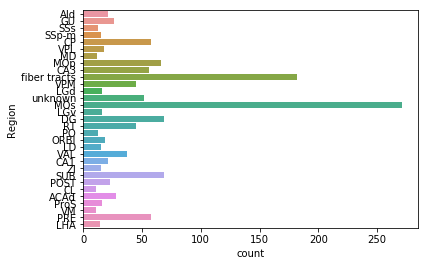

In [2]:
sf = ns.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>10])],
                 )

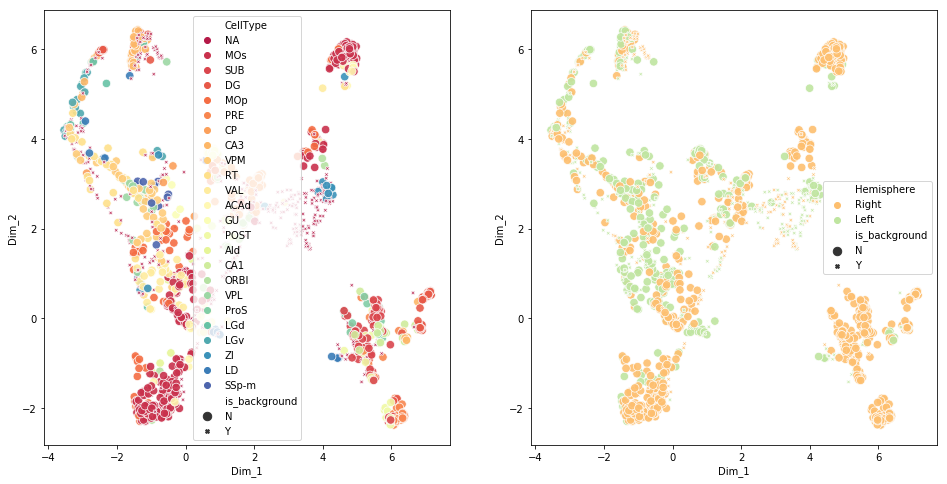

In [3]:
_ = ns.ReduceDimUMAP(feature_set="projection_features", n_neighbors=100)
_ = ns.FeatureScatter(["CellType", "Hemisphere"], map="UMAP")

### Speed of parallel
* for an array testA = nmt.annotation.array[55:90,120:167,179:231].copy()
    * There are 85540 points inside
    * Takes 29.143057346343994 second to run the code.
* For the original array
    * There are 77045760 points inside
    * It may take about 7.25 hours to store all the point. We will try that this evening.

In [5]:
x_block = [range(nmt.annotation.array.shape[0])[i:i + 30] for i in range(0, nmt.annotation.array.shape[0], 30)]
y_block = [range(nmt.annotation.array.shape[1])[i:i + 30] for i in range(0, nmt.annotation.array.shape[1], 30)]
z_block = [range(nmt.annotation.array.shape[2])[i:i + 30] for i in range(0, nmt.annotation.array.shape[2], 30)]

In [6]:
import multiprocessing
import time
def Contour_block26(Temp_arr):
    co_1,co_2,co_3 = np.where(Temp_arr != 0) 
    block_list=[]
    for iter_COR in range(len(co_1)):
        x_in = co_1[iter_COR]
        y_in = co_2[iter_COR]
        z_in = co_3[iter_COR]
        centerV =  Temp_arr[x_in,y_in, z_in]  
        
        x1yz = Temp_arr[max(0,x_in-1),y_in,z_in]                    # -1,0,0
        x2yz = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,z_in]  # +1,0,0
        xy1z = Temp_arr[x_in,max(0,y_in-1),z_in]                    # 0,-1,0
        xy2z = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),z_in]  # 0,+1,0
        xyz1 = Temp_arr[x_in,y_in,max(0,z_in-1)]                    # 0,0,-1
        xyz2 = Temp_arr[x_in,y_in,min(Temp_arr.shape[2]-1,z_in+1)]  # 0,0,+1
        
        
        x1y1z = Temp_arr[max(0,x_in-1),max(0,y_in-1),z_in]    
        x1y2z = Temp_arr[max(0,x_in-1),min(Temp_arr.shape[1]-1,y_in+1),z_in]    
        x2y1z = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),max(0,y_in-1),z_in]    
        x2y2z = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),min(Temp_arr.shape[1]-1,y_in+1),z_in]   
        
        xy1z1 = Temp_arr[x_in,max(0,y_in-1),max(0,z_in-1)]                    
        xy2z1 = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),max(0,z_in-1)]  
        xy1z2 = Temp_arr[x_in,max(0,y_in-1),min(Temp_arr.shape[2]-1,z_in+1)]                    
        xy2z2 = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),min(Temp_arr.shape[2]-1,z_in+1)]  
        
        x1yz1 = Temp_arr[max(0,x_in-1),y_in,max(0,z_in-1)]                    
        x1yz2 = Temp_arr[max(0,x_in-1),y_in,min(Temp_arr.shape[2]-1,z_in+1)]  
        x2yz1 = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,max(0,z_in-1)]                    
        x2yz2 = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,min(Temp_arr.shape[2]-1,z_in+1)] 
        
        if not all(v == centerV for v in [x1yz,x2yz,xy1z,xy2z,xyz1,xyz2,x1y1z,x1y2z,x2y1z,x2y2z,xy1z1,xy2z1,
                                          xy1z2,xy2z2,x1yz1,x1yz2,x2yz1,x2yz2]):
            block_list.append([x_in,y_in,z_in])
    return (block_list)



start = time.perf_counter ()
start=time.time()


result_list=[]   
for iter_X in x_block:
    for iter_Y in y_block:
        for iter_Z in z_block:
            temp_array = nmt.annotation.array[iter_X[0]:iter_X[-1]+1,iter_Y[0]:iter_Y[-1]+1,iter_Z[0]:iter_Z[-1]+1].copy()
            result_list.append(Contour_block18(temp_array))
            print('X range: '+str(iter_X[0])+':'+ str(iter_X[-1]+1)+'; Y range: '+str(iter_Y[0])+':'+ str(iter_Y[-1]+1)+'; Z range: '+str(iter_Z[0])+':'+ str(iter_Z[-1]+1))
print('Have finished the checking part')

elapsed = (time.time() - start)
print('Time needed to run the whole matrix is '+ str(elapsed))
#ContourDic['ALL']= ([xx for xx in  result_list])

X range: 0:30; Y range: 0:30; Z range: 0:30
X range: 0:30; Y range: 0:30; Z range: 30:60
X range: 0:30; Y range: 0:30; Z range: 60:90
X range: 0:30; Y range: 0:30; Z range: 90:120
X range: 0:30; Y range: 0:30; Z range: 120:150
X range: 0:30; Y range: 0:30; Z range: 150:180
X range: 0:30; Y range: 0:30; Z range: 180:210
X range: 0:30; Y range: 0:30; Z range: 210:240
X range: 0:30; Y range: 0:30; Z range: 240:270
X range: 0:30; Y range: 0:30; Z range: 270:300
X range: 0:30; Y range: 0:30; Z range: 300:330
X range: 0:30; Y range: 0:30; Z range: 330:360
X range: 0:30; Y range: 0:30; Z range: 360:390
X range: 0:30; Y range: 0:30; Z range: 390:420
X range: 0:30; Y range: 0:30; Z range: 420:450
X range: 0:30; Y range: 0:30; Z range: 450:456
X range: 0:30; Y range: 30:60; Z range: 0:30
X range: 0:30; Y range: 30:60; Z range: 30:60
X range: 0:30; Y range: 30:60; Z range: 60:90
X range: 0:30; Y range: 30:60; Z range: 90:120
X range: 0:30; Y range: 30:60; Z range: 120:150
X range: 0:30; Y range: 

X range: 30:60; Y range: 90:120; Z range: 150:180
X range: 30:60; Y range: 90:120; Z range: 180:210
X range: 30:60; Y range: 90:120; Z range: 210:240
X range: 30:60; Y range: 90:120; Z range: 240:270
X range: 30:60; Y range: 90:120; Z range: 270:300
X range: 30:60; Y range: 90:120; Z range: 300:330
X range: 30:60; Y range: 90:120; Z range: 330:360
X range: 30:60; Y range: 90:120; Z range: 360:390
X range: 30:60; Y range: 90:120; Z range: 390:420
X range: 30:60; Y range: 90:120; Z range: 420:450
X range: 30:60; Y range: 90:120; Z range: 450:456
X range: 30:60; Y range: 120:150; Z range: 0:30
X range: 30:60; Y range: 120:150; Z range: 30:60
X range: 30:60; Y range: 120:150; Z range: 60:90
X range: 30:60; Y range: 120:150; Z range: 90:120
X range: 30:60; Y range: 120:150; Z range: 120:150
X range: 30:60; Y range: 120:150; Z range: 150:180
X range: 30:60; Y range: 120:150; Z range: 180:210
X range: 30:60; Y range: 120:150; Z range: 210:240
X range: 30:60; Y range: 120:150; Z range: 240:270

X range: 60:90; Y range: 90:120; Z range: 120:150
X range: 60:90; Y range: 90:120; Z range: 150:180
X range: 60:90; Y range: 90:120; Z range: 180:210
X range: 60:90; Y range: 90:120; Z range: 210:240
X range: 60:90; Y range: 90:120; Z range: 240:270
X range: 60:90; Y range: 90:120; Z range: 270:300
X range: 60:90; Y range: 90:120; Z range: 300:330
X range: 60:90; Y range: 90:120; Z range: 330:360
X range: 60:90; Y range: 90:120; Z range: 360:390
X range: 60:90; Y range: 90:120; Z range: 390:420
X range: 60:90; Y range: 90:120; Z range: 420:450
X range: 60:90; Y range: 90:120; Z range: 450:456
X range: 60:90; Y range: 120:150; Z range: 0:30
X range: 60:90; Y range: 120:150; Z range: 30:60
X range: 60:90; Y range: 120:150; Z range: 60:90
X range: 60:90; Y range: 120:150; Z range: 90:120
X range: 60:90; Y range: 120:150; Z range: 120:150
X range: 60:90; Y range: 120:150; Z range: 150:180
X range: 60:90; Y range: 120:150; Z range: 180:210
X range: 60:90; Y range: 120:150; Z range: 210:240


X range: 90:120; Y range: 60:90; Z range: 240:270
X range: 90:120; Y range: 60:90; Z range: 270:300
X range: 90:120; Y range: 60:90; Z range: 300:330
X range: 90:120; Y range: 60:90; Z range: 330:360
X range: 90:120; Y range: 60:90; Z range: 360:390
X range: 90:120; Y range: 60:90; Z range: 390:420
X range: 90:120; Y range: 60:90; Z range: 420:450
X range: 90:120; Y range: 60:90; Z range: 450:456
X range: 90:120; Y range: 90:120; Z range: 0:30
X range: 90:120; Y range: 90:120; Z range: 30:60
X range: 90:120; Y range: 90:120; Z range: 60:90
X range: 90:120; Y range: 90:120; Z range: 90:120
X range: 90:120; Y range: 90:120; Z range: 120:150
X range: 90:120; Y range: 90:120; Z range: 150:180
X range: 90:120; Y range: 90:120; Z range: 180:210
X range: 90:120; Y range: 90:120; Z range: 210:240
X range: 90:120; Y range: 90:120; Z range: 240:270
X range: 90:120; Y range: 90:120; Z range: 270:300
X range: 90:120; Y range: 90:120; Z range: 300:330
X range: 90:120; Y range: 90:120; Z range: 330:

X range: 120:150; Y range: 30:60; Z range: 270:300
X range: 120:150; Y range: 30:60; Z range: 300:330
X range: 120:150; Y range: 30:60; Z range: 330:360
X range: 120:150; Y range: 30:60; Z range: 360:390
X range: 120:150; Y range: 30:60; Z range: 390:420
X range: 120:150; Y range: 30:60; Z range: 420:450
X range: 120:150; Y range: 30:60; Z range: 450:456
X range: 120:150; Y range: 60:90; Z range: 0:30
X range: 120:150; Y range: 60:90; Z range: 30:60
X range: 120:150; Y range: 60:90; Z range: 60:90
X range: 120:150; Y range: 60:90; Z range: 90:120
X range: 120:150; Y range: 60:90; Z range: 120:150
X range: 120:150; Y range: 60:90; Z range: 150:180
X range: 120:150; Y range: 60:90; Z range: 180:210
X range: 120:150; Y range: 60:90; Z range: 210:240
X range: 120:150; Y range: 60:90; Z range: 240:270
X range: 120:150; Y range: 60:90; Z range: 270:300
X range: 120:150; Y range: 60:90; Z range: 300:330
X range: 120:150; Y range: 60:90; Z range: 330:360
X range: 120:150; Y range: 60:90; Z ran

X range: 150:180; Y range: 30:60; Z range: 150:180
X range: 150:180; Y range: 30:60; Z range: 180:210
X range: 150:180; Y range: 30:60; Z range: 210:240
X range: 150:180; Y range: 30:60; Z range: 240:270
X range: 150:180; Y range: 30:60; Z range: 270:300
X range: 150:180; Y range: 30:60; Z range: 300:330
X range: 150:180; Y range: 30:60; Z range: 330:360
X range: 150:180; Y range: 30:60; Z range: 360:390
X range: 150:180; Y range: 30:60; Z range: 390:420
X range: 150:180; Y range: 30:60; Z range: 420:450
X range: 150:180; Y range: 30:60; Z range: 450:456
X range: 150:180; Y range: 60:90; Z range: 0:30
X range: 150:180; Y range: 60:90; Z range: 30:60
X range: 150:180; Y range: 60:90; Z range: 60:90
X range: 150:180; Y range: 60:90; Z range: 90:120
X range: 150:180; Y range: 60:90; Z range: 120:150
X range: 150:180; Y range: 60:90; Z range: 150:180
X range: 150:180; Y range: 60:90; Z range: 180:210
X range: 150:180; Y range: 60:90; Z range: 210:240
X range: 150:180; Y range: 60:90; Z ran

X range: 180:210; Y range: 30:60; Z range: 120:150
X range: 180:210; Y range: 30:60; Z range: 150:180
X range: 180:210; Y range: 30:60; Z range: 180:210
X range: 180:210; Y range: 30:60; Z range: 210:240
X range: 180:210; Y range: 30:60; Z range: 240:270
X range: 180:210; Y range: 30:60; Z range: 270:300
X range: 180:210; Y range: 30:60; Z range: 300:330
X range: 180:210; Y range: 30:60; Z range: 330:360
X range: 180:210; Y range: 30:60; Z range: 360:390
X range: 180:210; Y range: 30:60; Z range: 390:420
X range: 180:210; Y range: 30:60; Z range: 420:450
X range: 180:210; Y range: 30:60; Z range: 450:456
X range: 180:210; Y range: 60:90; Z range: 0:30
X range: 180:210; Y range: 60:90; Z range: 30:60
X range: 180:210; Y range: 60:90; Z range: 60:90
X range: 180:210; Y range: 60:90; Z range: 90:120
X range: 180:210; Y range: 60:90; Z range: 120:150
X range: 180:210; Y range: 60:90; Z range: 150:180
X range: 180:210; Y range: 60:90; Z range: 180:210
X range: 180:210; Y range: 60:90; Z ran

X range: 210:240; Y range: 0:30; Z range: 150:180
X range: 210:240; Y range: 0:30; Z range: 180:210
X range: 210:240; Y range: 0:30; Z range: 210:240
X range: 210:240; Y range: 0:30; Z range: 240:270
X range: 210:240; Y range: 0:30; Z range: 270:300
X range: 210:240; Y range: 0:30; Z range: 300:330
X range: 210:240; Y range: 0:30; Z range: 330:360
X range: 210:240; Y range: 0:30; Z range: 360:390
X range: 210:240; Y range: 0:30; Z range: 390:420
X range: 210:240; Y range: 0:30; Z range: 420:450
X range: 210:240; Y range: 0:30; Z range: 450:456
X range: 210:240; Y range: 30:60; Z range: 0:30
X range: 210:240; Y range: 30:60; Z range: 30:60
X range: 210:240; Y range: 30:60; Z range: 60:90
X range: 210:240; Y range: 30:60; Z range: 90:120
X range: 210:240; Y range: 30:60; Z range: 120:150
X range: 210:240; Y range: 30:60; Z range: 150:180
X range: 210:240; Y range: 30:60; Z range: 180:210
X range: 210:240; Y range: 30:60; Z range: 210:240
X range: 210:240; Y range: 30:60; Z range: 240:270

X range: 240:270; Y range: 0:30; Z range: 120:150
X range: 240:270; Y range: 0:30; Z range: 150:180
X range: 240:270; Y range: 0:30; Z range: 180:210
X range: 240:270; Y range: 0:30; Z range: 210:240
X range: 240:270; Y range: 0:30; Z range: 240:270
X range: 240:270; Y range: 0:30; Z range: 270:300
X range: 240:270; Y range: 0:30; Z range: 300:330
X range: 240:270; Y range: 0:30; Z range: 330:360
X range: 240:270; Y range: 0:30; Z range: 360:390
X range: 240:270; Y range: 0:30; Z range: 390:420
X range: 240:270; Y range: 0:30; Z range: 420:450
X range: 240:270; Y range: 0:30; Z range: 450:456
X range: 240:270; Y range: 30:60; Z range: 0:30
X range: 240:270; Y range: 30:60; Z range: 30:60
X range: 240:270; Y range: 30:60; Z range: 60:90
X range: 240:270; Y range: 30:60; Z range: 90:120
X range: 240:270; Y range: 30:60; Z range: 120:150
X range: 240:270; Y range: 30:60; Z range: 150:180
X range: 240:270; Y range: 30:60; Z range: 180:210
X range: 240:270; Y range: 30:60; Z range: 210:240


X range: 270:300; Y range: 0:30; Z range: 120:150
X range: 270:300; Y range: 0:30; Z range: 150:180
X range: 270:300; Y range: 0:30; Z range: 180:210
X range: 270:300; Y range: 0:30; Z range: 210:240
X range: 270:300; Y range: 0:30; Z range: 240:270
X range: 270:300; Y range: 0:30; Z range: 270:300
X range: 270:300; Y range: 0:30; Z range: 300:330
X range: 270:300; Y range: 0:30; Z range: 330:360
X range: 270:300; Y range: 0:30; Z range: 360:390
X range: 270:300; Y range: 0:30; Z range: 390:420
X range: 270:300; Y range: 0:30; Z range: 420:450
X range: 270:300; Y range: 0:30; Z range: 450:456
X range: 270:300; Y range: 30:60; Z range: 0:30
X range: 270:300; Y range: 30:60; Z range: 30:60
X range: 270:300; Y range: 30:60; Z range: 60:90
X range: 270:300; Y range: 30:60; Z range: 90:120
X range: 270:300; Y range: 30:60; Z range: 120:150
X range: 270:300; Y range: 30:60; Z range: 150:180
X range: 270:300; Y range: 30:60; Z range: 180:210
X range: 270:300; Y range: 30:60; Z range: 210:240


X range: 300:330; Y range: 0:30; Z range: 120:150
X range: 300:330; Y range: 0:30; Z range: 150:180
X range: 300:330; Y range: 0:30; Z range: 180:210
X range: 300:330; Y range: 0:30; Z range: 210:240
X range: 300:330; Y range: 0:30; Z range: 240:270
X range: 300:330; Y range: 0:30; Z range: 270:300
X range: 300:330; Y range: 0:30; Z range: 300:330
X range: 300:330; Y range: 0:30; Z range: 330:360
X range: 300:330; Y range: 0:30; Z range: 360:390
X range: 300:330; Y range: 0:30; Z range: 390:420
X range: 300:330; Y range: 0:30; Z range: 420:450
X range: 300:330; Y range: 0:30; Z range: 450:456
X range: 300:330; Y range: 30:60; Z range: 0:30
X range: 300:330; Y range: 30:60; Z range: 30:60
X range: 300:330; Y range: 30:60; Z range: 60:90
X range: 300:330; Y range: 30:60; Z range: 90:120
X range: 300:330; Y range: 30:60; Z range: 120:150
X range: 300:330; Y range: 30:60; Z range: 150:180
X range: 300:330; Y range: 30:60; Z range: 180:210
X range: 300:330; Y range: 30:60; Z range: 210:240


X range: 330:360; Y range: 0:30; Z range: 120:150
X range: 330:360; Y range: 0:30; Z range: 150:180
X range: 330:360; Y range: 0:30; Z range: 180:210
X range: 330:360; Y range: 0:30; Z range: 210:240
X range: 330:360; Y range: 0:30; Z range: 240:270
X range: 330:360; Y range: 0:30; Z range: 270:300
X range: 330:360; Y range: 0:30; Z range: 300:330
X range: 330:360; Y range: 0:30; Z range: 330:360
X range: 330:360; Y range: 0:30; Z range: 360:390
X range: 330:360; Y range: 0:30; Z range: 390:420
X range: 330:360; Y range: 0:30; Z range: 420:450
X range: 330:360; Y range: 0:30; Z range: 450:456
X range: 330:360; Y range: 30:60; Z range: 0:30
X range: 330:360; Y range: 30:60; Z range: 30:60
X range: 330:360; Y range: 30:60; Z range: 60:90
X range: 330:360; Y range: 30:60; Z range: 90:120
X range: 330:360; Y range: 30:60; Z range: 120:150
X range: 330:360; Y range: 30:60; Z range: 150:180
X range: 330:360; Y range: 30:60; Z range: 180:210
X range: 330:360; Y range: 30:60; Z range: 210:240


X range: 360:390; Y range: 0:30; Z range: 120:150
X range: 360:390; Y range: 0:30; Z range: 150:180
X range: 360:390; Y range: 0:30; Z range: 180:210
X range: 360:390; Y range: 0:30; Z range: 210:240
X range: 360:390; Y range: 0:30; Z range: 240:270
X range: 360:390; Y range: 0:30; Z range: 270:300
X range: 360:390; Y range: 0:30; Z range: 300:330
X range: 360:390; Y range: 0:30; Z range: 330:360
X range: 360:390; Y range: 0:30; Z range: 360:390
X range: 360:390; Y range: 0:30; Z range: 390:420
X range: 360:390; Y range: 0:30; Z range: 420:450
X range: 360:390; Y range: 0:30; Z range: 450:456
X range: 360:390; Y range: 30:60; Z range: 0:30
X range: 360:390; Y range: 30:60; Z range: 30:60
X range: 360:390; Y range: 30:60; Z range: 60:90
X range: 360:390; Y range: 30:60; Z range: 90:120
X range: 360:390; Y range: 30:60; Z range: 120:150
X range: 360:390; Y range: 30:60; Z range: 150:180
X range: 360:390; Y range: 30:60; Z range: 180:210
X range: 360:390; Y range: 30:60; Z range: 210:240


X range: 390:420; Y range: 30:60; Z range: 120:150
X range: 390:420; Y range: 30:60; Z range: 150:180
X range: 390:420; Y range: 30:60; Z range: 180:210
X range: 390:420; Y range: 30:60; Z range: 210:240
X range: 390:420; Y range: 30:60; Z range: 240:270
X range: 390:420; Y range: 30:60; Z range: 270:300
X range: 390:420; Y range: 30:60; Z range: 300:330
X range: 390:420; Y range: 30:60; Z range: 330:360
X range: 390:420; Y range: 30:60; Z range: 360:390
X range: 390:420; Y range: 30:60; Z range: 390:420
X range: 390:420; Y range: 30:60; Z range: 420:450
X range: 390:420; Y range: 30:60; Z range: 450:456
X range: 390:420; Y range: 60:90; Z range: 0:30
X range: 390:420; Y range: 60:90; Z range: 30:60
X range: 390:420; Y range: 60:90; Z range: 60:90
X range: 390:420; Y range: 60:90; Z range: 90:120
X range: 390:420; Y range: 60:90; Z range: 120:150
X range: 390:420; Y range: 60:90; Z range: 150:180
X range: 390:420; Y range: 60:90; Z range: 180:210
X range: 390:420; Y range: 60:90; Z ran

X range: 420:450; Y range: 30:60; Z range: 150:180
X range: 420:450; Y range: 30:60; Z range: 180:210
X range: 420:450; Y range: 30:60; Z range: 210:240
X range: 420:450; Y range: 30:60; Z range: 240:270
X range: 420:450; Y range: 30:60; Z range: 270:300
X range: 420:450; Y range: 30:60; Z range: 300:330
X range: 420:450; Y range: 30:60; Z range: 330:360
X range: 420:450; Y range: 30:60; Z range: 360:390
X range: 420:450; Y range: 30:60; Z range: 390:420
X range: 420:450; Y range: 30:60; Z range: 420:450
X range: 420:450; Y range: 30:60; Z range: 450:456
X range: 420:450; Y range: 60:90; Z range: 0:30
X range: 420:450; Y range: 60:90; Z range: 30:60
X range: 420:450; Y range: 60:90; Z range: 60:90
X range: 420:450; Y range: 60:90; Z range: 90:120
X range: 420:450; Y range: 60:90; Z range: 120:150
X range: 420:450; Y range: 60:90; Z range: 150:180
X range: 420:450; Y range: 60:90; Z range: 180:210
X range: 420:450; Y range: 60:90; Z range: 210:240
X range: 420:450; Y range: 60:90; Z ran

X range: 450:480; Y range: 30:60; Z range: 120:150
X range: 450:480; Y range: 30:60; Z range: 150:180
X range: 450:480; Y range: 30:60; Z range: 180:210
X range: 450:480; Y range: 30:60; Z range: 210:240
X range: 450:480; Y range: 30:60; Z range: 240:270
X range: 450:480; Y range: 30:60; Z range: 270:300
X range: 450:480; Y range: 30:60; Z range: 300:330
X range: 450:480; Y range: 30:60; Z range: 330:360
X range: 450:480; Y range: 30:60; Z range: 360:390
X range: 450:480; Y range: 30:60; Z range: 390:420
X range: 450:480; Y range: 30:60; Z range: 420:450
X range: 450:480; Y range: 30:60; Z range: 450:456
X range: 450:480; Y range: 60:90; Z range: 0:30
X range: 450:480; Y range: 60:90; Z range: 30:60
X range: 450:480; Y range: 60:90; Z range: 60:90
X range: 450:480; Y range: 60:90; Z range: 90:120
X range: 450:480; Y range: 60:90; Z range: 120:150
X range: 450:480; Y range: 60:90; Z range: 150:180
X range: 450:480; Y range: 60:90; Z range: 180:210
X range: 450:480; Y range: 60:90; Z ran

X range: 480:510; Y range: 30:60; Z range: 210:240
X range: 480:510; Y range: 30:60; Z range: 240:270
X range: 480:510; Y range: 30:60; Z range: 270:300
X range: 480:510; Y range: 30:60; Z range: 300:330
X range: 480:510; Y range: 30:60; Z range: 330:360
X range: 480:510; Y range: 30:60; Z range: 360:390
X range: 480:510; Y range: 30:60; Z range: 390:420
X range: 480:510; Y range: 30:60; Z range: 420:450
X range: 480:510; Y range: 30:60; Z range: 450:456
X range: 480:510; Y range: 60:90; Z range: 0:30
X range: 480:510; Y range: 60:90; Z range: 30:60
X range: 480:510; Y range: 60:90; Z range: 60:90
X range: 480:510; Y range: 60:90; Z range: 90:120
X range: 480:510; Y range: 60:90; Z range: 120:150
X range: 480:510; Y range: 60:90; Z range: 150:180
X range: 480:510; Y range: 60:90; Z range: 180:210
X range: 480:510; Y range: 60:90; Z range: 210:240
X range: 480:510; Y range: 60:90; Z range: 240:270
X range: 480:510; Y range: 60:90; Z range: 270:300
X range: 480:510; Y range: 60:90; Z ran

X range: 510:528; Y range: 60:90; Z range: 210:240
X range: 510:528; Y range: 60:90; Z range: 240:270
X range: 510:528; Y range: 60:90; Z range: 270:300
X range: 510:528; Y range: 60:90; Z range: 300:330
X range: 510:528; Y range: 60:90; Z range: 330:360
X range: 510:528; Y range: 60:90; Z range: 360:390
X range: 510:528; Y range: 60:90; Z range: 390:420
X range: 510:528; Y range: 60:90; Z range: 420:450
X range: 510:528; Y range: 60:90; Z range: 450:456
X range: 510:528; Y range: 90:120; Z range: 0:30
X range: 510:528; Y range: 90:120; Z range: 30:60
X range: 510:528; Y range: 90:120; Z range: 60:90
X range: 510:528; Y range: 90:120; Z range: 90:120
X range: 510:528; Y range: 90:120; Z range: 120:150
X range: 510:528; Y range: 90:120; Z range: 150:180
X range: 510:528; Y range: 90:120; Z range: 180:210
X range: 510:528; Y range: 90:120; Z range: 210:240
X range: 510:528; Y range: 90:120; Z range: 240:270
X range: 510:528; Y range: 90:120; Z range: 270:300
X range: 510:528; Y range: 90

In [7]:
result_final =  [x for x in result_list if len(x)>0]

In [8]:
Contour_M = nmt.annotation.array.copy()
Contour_M[:,:,:] = 0
start = time.perf_counter ()
start=time.time()
for i in result_final:
    start_sub = time.time()
    for detail_i in i:
        Contour_M[detail_i]=3
    elapsed_sub = time.time()-start_sub
    print('Time needed to generate that block is '+ str(elapsed_sub ))
elapsed = (time.time() - start)
print('Time needed to generate the contour matrix from idx is '+ str(elapsed))

Time needed to generate that block is 0.0072062015533447266
Time needed to generate that block is 0.12322211265563965
Time needed to generate that block is 0.04003262519836426
Time needed to generate that block is 0.10820603370666504
Time needed to generate that block is 0.02008652687072754
Time needed to generate that block is 0.34621381759643555
Time needed to generate that block is 0.3386104106903076
Time needed to generate that block is 0.4765198230743408
Time needed to generate that block is 0.33380866050720215
Time needed to generate that block is 0.3894157409667969
Time needed to generate that block is 0.009040594100952148
Time needed to generate that block is 0.0005018711090087891
Time needed to generate that block is 0.4891936779022217
Time needed to generate that block is 0.28273844718933105
Time needed to generate that block is 0.5504696369171143
Time needed to generate that block is 0.29119157791137695
Time needed to generate that block is 0.48729538917541504
Time needed to

Time needed to generate that block is 0.9905798435211182
Time needed to generate that block is 0.9902637004852295
Time needed to generate that block is 1.0533292293548584
Time needed to generate that block is 1.0669198036193848
Time needed to generate that block is 0.9368793964385986
Time needed to generate that block is 0.28539061546325684
Time needed to generate that block is 0.002969980239868164
Time needed to generate that block is 0.3684957027435303
Time needed to generate that block is 0.3910970687866211
Time needed to generate that block is 0.5888595581054688
Time needed to generate that block is 0.6661021709442139
Time needed to generate that block is 0.577707052230835
Time needed to generate that block is 0.32401156425476074
Time needed to generate that block is 0.5628089904785156
Time needed to generate that block is 0.016883373260498047
Time needed to generate that block is 0.040419578552246094
Time needed to generate that block is 0.413494348526001
Time needed to generate t

Time needed to generate that block is 0.6941471099853516
Time needed to generate that block is 0.8157758712768555
Time needed to generate that block is 0.8234026432037354
Time needed to generate that block is 0.6661126613616943
Time needed to generate that block is 0.978569746017456
Time needed to generate that block is 1.1463358402252197
Time needed to generate that block is 1.0149061679840088
Time needed to generate that block is 0.5574607849121094
Time needed to generate that block is 0.8974704742431641
Time needed to generate that block is 0.7850990295410156
Time needed to generate that block is 0.8311705589294434
Time needed to generate that block is 0.05681943893432617
Time needed to generate that block is 0.00710296630859375
Time needed to generate that block is 0.9544000625610352
Time needed to generate that block is 1.0727872848510742
Time needed to generate that block is 0.808429479598999
Time needed to generate that block is 0.248429536819458
Time needed to generate that blo

Time needed to generate that block is 1.0145971775054932
Time needed to generate that block is 1.0905067920684814
Time needed to generate that block is 0.9884278774261475
Time needed to generate that block is 0.7589688301086426
Time needed to generate that block is 0.33258724212646484
Time needed to generate that block is 0.7827253341674805
Time needed to generate that block is 0.5341777801513672
Time needed to generate that block is 0.07846951484680176
Time needed to generate that block is 0.06820559501647949
Time needed to generate that block is 0.3557283878326416
Time needed to generate that block is 0.7751955986022949
Time needed to generate that block is 0.40006518363952637
Time needed to generate that block is 0.9713895320892334
Time needed to generate that block is 1.1044797897338867
Time needed to generate that block is 1.082787275314331
Time needed to generate that block is 0.4408755302429199
Time needed to generate that block is 0.6991324424743652
Time needed to generate that

Time needed to generate that block is 0.8345050811767578
Time needed to generate that block is 0.8639533519744873
Time needed to generate that block is 0.7232987880706787
Time needed to generate that block is 0.892193078994751
Time needed to generate that block is 0.5706510543823242
Time needed to generate that block is 0.06763243675231934
Time needed to generate that block is 0.00070953369140625
Time needed to generate that block is 0.0005831718444824219
Time needed to generate that block is 0.0004754066467285156
Time needed to generate that block is 0.18676280975341797
Time needed to generate that block is 0.4074442386627197
Time needed to generate that block is 0.5955028533935547
Time needed to generate that block is 0.31223630905151367
Time needed to generate that block is 0.6001925468444824
Time needed to generate that block is 0.48384642601013184
Time needed to generate that block is 0.26396751403808594
Time needed to generate that block is 0.009257793426513672
Time needed to gen

Time needed to generate that block is 0.6887590885162354
Time needed to generate that block is 0.6233479976654053
Time needed to generate that block is 0.5660486221313477
Time needed to generate that block is 0.6749110221862793
Time needed to generate that block is 0.7041668891906738
Time needed to generate that block is 0.38907551765441895
Time needed to generate that block is 0.07159709930419922
Time needed to generate that block is 0.29551076889038086
Time needed to generate that block is 0.8373064994812012
Time needed to generate that block is 1.1913056373596191
Time needed to generate that block is 1.39347505569458
Time needed to generate that block is 1.1762428283691406
Time needed to generate that block is 0.8296728134155273
Time needed to generate that block is 1.0279920101165771
Time needed to generate that block is 1.389800786972046
Time needed to generate that block is 1.1985805034637451
Time needed to generate that block is 0.976466178894043
Time needed to generate that blo

Time needed to generate that block is 1.2789483070373535
Time needed to generate that block is 1.5064365863800049
Time needed to generate that block is 1.3614609241485596
Time needed to generate that block is 1.1055445671081543
Time needed to generate that block is 0.8389661312103271
Time needed to generate that block is 0.8448197841644287
Time needed to generate that block is 1.2906980514526367
Time needed to generate that block is 1.5873148441314697
Time needed to generate that block is 1.1753499507904053
Time needed to generate that block is 0.6816487312316895
Time needed to generate that block is 0.009172916412353516
Time needed to generate that block is 0.48975515365600586
Time needed to generate that block is 1.390108585357666
Time needed to generate that block is 1.4531307220458984
Time needed to generate that block is 0.6006720066070557
Time needed to generate that block is 0.7492384910583496
Time needed to generate that block is 1.3287334442138672
Time needed to generate that 

Time needed to generate that block is 0.37168288230895996
Time needed to generate that block is 1.3976263999938965
Time needed to generate that block is 1.4816639423370361
Time needed to generate that block is 1.3041787147521973
Time needed to generate that block is 1.2439918518066406
Time needed to generate that block is 1.3844630718231201
Time needed to generate that block is 1.2040212154388428
Time needed to generate that block is 1.3148396015167236
Time needed to generate that block is 1.3792169094085693
Time needed to generate that block is 1.2231521606445312
Time needed to generate that block is 1.4599761962890625
Time needed to generate that block is 1.3865463733673096
Time needed to generate that block is 0.691472053527832
Time needed to generate that block is 0.033258676528930664
Time needed to generate that block is 1.227114200592041
Time needed to generate that block is 1.4472599029541016
Time needed to generate that block is 0.5960021018981934
Time needed to generate that b

Time needed to generate that block is 0.7629673480987549
Time needed to generate that block is 1.3540563583374023
Time needed to generate that block is 1.2955682277679443
Time needed to generate that block is 0.9051711559295654
Time needed to generate that block is 0.7565715312957764
Time needed to generate that block is 0.685978889465332
Time needed to generate that block is 0.3673095703125
Time needed to generate that block is 0.6379494667053223
Time needed to generate that block is 0.6275482177734375
Time needed to generate that block is 0.9466125965118408
Time needed to generate that block is 1.1641809940338135
Time needed to generate that block is 1.4085590839385986
Time needed to generate that block is 0.9445910453796387
Time needed to generate that block is 0.01928997039794922
Time needed to generate that block is 0.03250479698181152
Time needed to generate that block is 1.1766242980957031
Time needed to generate that block is 1.2006909847259521
Time needed to generate that bloc

Time needed to generate that block is 0.42725682258605957
Time needed to generate that block is 0.9948115348815918
Time needed to generate that block is 0.7123274803161621
Time needed to generate that block is 0.8416352272033691
Time needed to generate that block is 1.0352537631988525
Time needed to generate that block is 1.1120109558105469
Time needed to generate that block is 1.2624008655548096
Time needed to generate that block is 1.1414530277252197
Time needed to generate that block is 0.9602646827697754
Time needed to generate that block is 1.0179164409637451
Time needed to generate that block is 0.643557071685791
Time needed to generate that block is 0.9509449005126953
Time needed to generate that block is 0.6704561710357666
Time needed to generate that block is 0.20453619956970215
Time needed to generate that block is 0.7111492156982422
Time needed to generate that block is 0.5907385349273682
Time needed to generate that block is 1.0866260528564453
Time needed to generate that b

Time needed to generate that block is 0.5340099334716797
Time needed to generate that block is 0.4584956169128418
Time needed to generate that block is 1.1176784038543701
Time needed to generate that block is 0.18274259567260742
Time needed to generate that block is 0.1453380584716797
Time needed to generate that block is 0.10386896133422852
Time needed to generate that block is 0.003528594970703125
Time needed to generate that block is 0.11351609230041504
Time needed to generate that block is 0.5665187835693359
Time needed to generate that block is 0.7391021251678467
Time needed to generate that block is 1.0078372955322266
Time needed to generate that block is 0.7878532409667969
Time needed to generate that block is 0.46294355392456055
Time needed to generate that block is 0.27744412422180176
Time needed to generate that block is 0.010970830917358398
Time needed to generate that block is 0.05689048767089844
Time needed to generate that block is 0.19472360610961914
Time needed to gener

Time needed to generate that block is 0.1315631866455078
Time needed to generate that block is 0.4472920894622803
Time needed to generate that block is 0.8663444519042969
Time needed to generate that block is 0.7940406799316406
Time needed to generate that block is 1.0452723503112793
Time needed to generate that block is 0.9848096370697021
Time needed to generate that block is 0.9643049240112305
Time needed to generate that block is 0.861320972442627
Time needed to generate that block is 0.9313156604766846
Time needed to generate that block is 0.5731179714202881
Time needed to generate that block is 0.20221829414367676
Time needed to generate that block is 0.1438920497894287
Time needed to generate that block is 0.41440463066101074
Time needed to generate that block is 0.48795151710510254
Time needed to generate that block is 0.8761866092681885
Time needed to generate that block is 0.873939037322998
Time needed to generate that block is 0.6885144710540771
Time needed to generate that b

In [9]:
regionN, count = np.unique(np.multiply(Contour_M==3,nmt.annotation.array), return_counts=True)
regionN

array([   0,  507,  698, 1016], dtype=uint32)

In [ ]:
pickle.dump([Contour_M], open("/home/penglab/NMTcode/contour_M_6.pickle", "wb"))